Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [94]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [96]:
boston_dataset = load_boston()

In [97]:
print(boston_dataset.keys())
#печатаем значение boston_dataset чтобы понять, что в нем содержится

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [98]:
#загрузим данные в фрейм данных pandas, используя pd.DataFrame, Затем мы печатаем первые 5 строк данных, используя head()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
#целевое значение MEDV отсутствует в данных. Мы создаем новый столбец целевых значений и добавляем его в фрейм данных.
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [100]:
#Сначала выберем случайный набор признаков boston['INDUS'], boston['AGE'], boston['DIS'] для обучения модели
X = pd.DataFrame(np.c_[boston['INDUS'], boston['AGE'], boston['DIS']], columns = ['INDUS','AGE', 'DIS'])
Y = boston['MEDV']

In [101]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

#model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [103]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [105]:
predictions = lin_model.predict(X_test)

In [106]:
predictions[:5] # посмотрим как выглядят наши предсказание

array([25.21087769, 29.39954529, 29.52397207, 18.30099242, 26.26958125])

In [107]:
Y_test[:5]

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: MEDV, dtype: float64

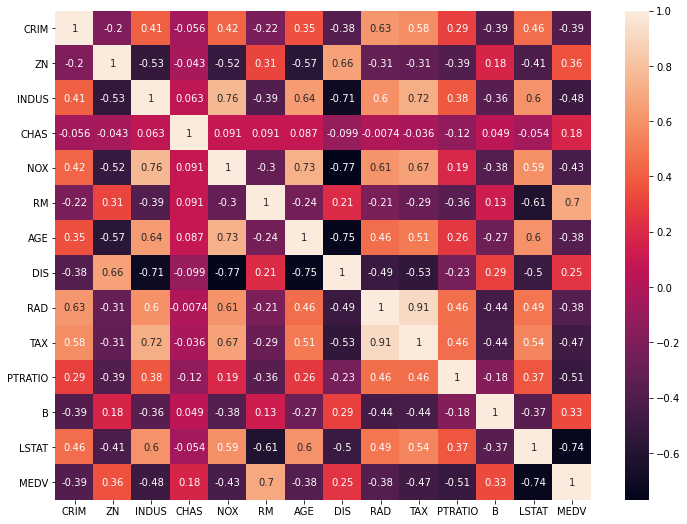

In [108]:
corr = boston.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

Визуально видим, что наиболее влияют на цену следующие признаки: LSTAT, RM, PTRATIO

In [109]:
lin_model.coef_

array([-0.74290668, -0.10009804, -1.60765509])

Заменим выбранные признаки на LSTAT, RM, PTRATIO

In [110]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM', 'PTRATIO'])
Y = boston['MEDV']

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [112]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [113]:
predictions = lin_model.predict(X_test)

In [114]:
predictions[:5] # посмотрим как выглядят наши предсказание

array([36.53407748, 28.276762  , 26.12017123,  1.11472371, 31.78921937])

In [115]:
Y_test[:5]

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: MEDV, dtype: float64

## Видим, что после замены признаков на наиболее значимые в целом предсказание улучшилось

 Теперь проверим, действительно ли признаки , которые мы выбрали по тепловой карте, действительно наибольше влияют на предсказание. Будем использовать алгоритм решающего дерева

In [116]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [117]:
names = boston_dataset.feature_names

In [118]:
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [119]:
array = boston.values
X = array[:,0:13] # dataframe --> массив numpy
Y = array[:,13]
# извлечение признаков
model = ExtraTreesRegressor()
model.fit(X, Y) # обучение
for i in range(len(names)):
    print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")

CRIM	- 0.0336
ZN	- 0.0046
INDUS	- 0.0319
CHAS	- 0.0142
NOX	- 0.0377
RM	- 0.3016
AGE	- 0.0184
DIS	- 0.0320
RAD	- 0.0204
TAX	- 0.0417
PTRATIO	- 0.0584
B	- 0.0187
LSTAT	- 0.3867


## используя алгоритм решающего дерева для отбора признаков, также видим, что признаки LSTAT- 0.3482, RM- 0.3413, PTRATIO- 0.0526 вносят максимальный вклад в предсказание